In [2]:
!python -m pip install prophet
!pip install plotly==5.9.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 68.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [3]:
from prophet.plot import plot_plotly,plot_components_plotly
import pandas as pd 

In [4]:
from prophet import Prophet

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()


,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [6]:
#df.dtypes


In [7]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzfg_ky0_/0imqmbzn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzfg_ky0_/abr4t81y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94730', 'data', 'file=/tmp/tmpzfg_ky0_/0imqmbzn.json', 'init=/tmp/tmpzfg_ky0_/abr4t81y.json', 'output', 'file=/tmp/tmpzfg_ky0_/prophet_modeldtcj4sf7/prophet_model-20230106172237.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:22:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:22:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [8]:
future = m.make_future_dataframe(periods = 365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [9]:
future.dtypes

ds    datetime64[ns]
dtype: object

In [10]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.208452,7.479390,8.987133
3266,2017-01-16,8.533442,7.821489,9.277314
3267,2017-01-17,8.320853,7.598832,9.058404
3268,2017-01-18,8.153517,7.433166,8.899436
3269,2017-01-19,8.165423,7.452263,8.932181


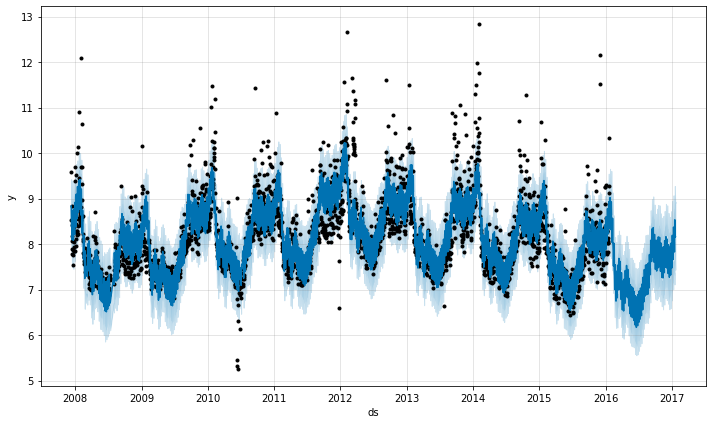

In [11]:
fig1 = m.plot(forecast)

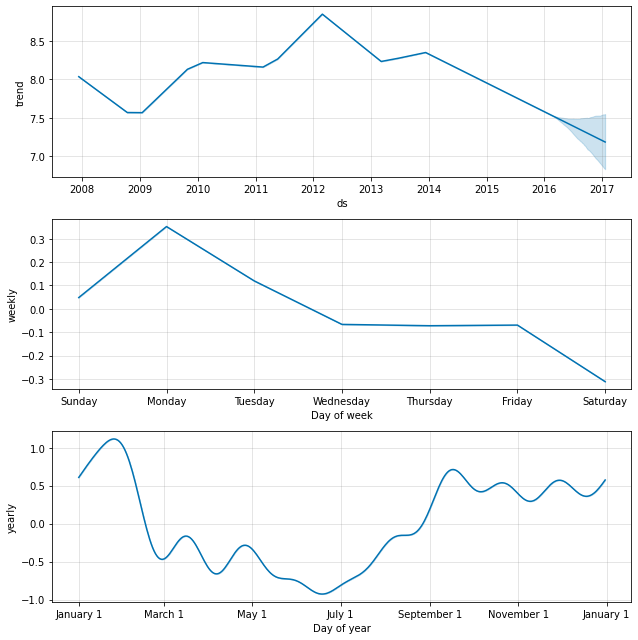

In [12]:

fig2 = m.plot_components(forecast)

In [13]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m,forecast)

In [14]:
plot_components_plotly(m,forecast)